In [173]:
import pandas as pd
import datetime as dt
import seaborn as sns
import os
import subprocess
import matplotlib.pyplot as plt
import re
import numpy as np

In [7]:
tracking_df = pd.read_csv("https://covidtracking.com/api/v1/states/daily.csv")

In [163]:
state = pd.read_csv('/Users/CharlesFederici/corona_python/admin/states.csv')

In [9]:
tracking_df['date'] = pd.to_datetime(tracking_df['date'], format='%Y%m%d')

In [18]:
tracking_df.head().transpose()

,0,1,2,3,4
date,2020-06-12 00:00:00,2020-06-12 00:00:00,2020-06-12 00:00:00,2020-06-12 00:00:00,2020-06-12 00:00:00
state,AK,AL,AR,AS,AZ
positive,625,23710,11547,0,32918
negative,70255,262675,169575,174,278318
pending,NaN,NaN,NaN,NaN,NaN
hospitalizedCurrently,15,622,203,NaN,1336
hospitalizedCumulative,NaN,2202,961,NaN,3622
inIcuCurrently,NaN,NaN,NaN,NaN,429
inIcuCumulative,NaN,658,NaN,NaN,NaN
onVentilatorCurrently,3,NaN,49,NaN,278


In [23]:
tracking_df[['date', 'state', 'positive', 
             'negative', 'positiveIncrease', 
             'negativeIncrease','dataQualityGrade']] \
    .to_csv("/Users/CharlesFederici/corona_python/data/testing.csv")

In [29]:
tracking_df_total = pd.read_csv("https://covidtracking.com/api/v1/us/daily.csv")
tracking_df_total['date'] = pd.to_datetime(tracking_df_total['date'], format='%Y%m%d')

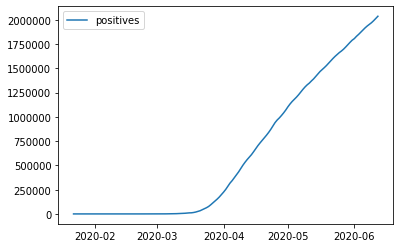

In [36]:
fig, ax = plt.subplots()
ax.plot(tracking_df_total['date'], tracking_df_total['positive'], label="positives")
ax.legend()

In [31]:
tracking_df_total.head().transpose()

,0,1,2,3,4
date,2020-06-12 00:00:00,2020-06-11 00:00:00,2020-06-10 00:00:00,2020-06-09 00:00:00,2020-06-08 00:00:00
states,56,56,56,56,56
positive,2037530,2013778,1991527,1970765,1953730
negative,2.04797e+07,1.99195e+07,1.9495e+07,1.90963e+07,1.86996e+07
pending,1783,1816,1737,1661,1606
hospitalizedCurrently,28524,29064,30203,30547,29969
hospitalizedCumulative,223281,221983,220602,219089,217581
inIcuCurrently,6012,6067,6242,6450,6394
inIcuCumulative,9373,9295,9225,9141,9013
onVentilatorCurrently,2734,2886,3020,3090,3240


In [193]:
# Separate data frames for begin - 3/21 and 3/22 to current

folder_location = '/Users/CharlesFederici/corona_python/data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'

files_to_read = os.listdir(folder_location)
case_reports_a = []
case_reports_b = []
for file_to_read in files_to_read:
    if re.match(r'.*.csv', file_to_read):
        df = pd.read_csv(folder_location + file_to_read)
        file_date = re.search(r"(.*)\.csv", file_to_read)
        df['report_date'] = pd.to_datetime(file_date.group(1))
        if pd.to_datetime(file_date.group(1)) <= pd.to_datetime("2020-03-21"):
            case_reports_a.append(df)
        else:
            case_reports_b.append(df)

case_reports_a = pd.concat(case_reports_a, axis=0, ignore_index=True)
case_reports_b = pd.concat(case_reports_b, axis=0, ignore_index=True)

In [136]:
case_reports_b.head().transpose()

,0,1,2,3,4
FIPS,45001,22001,51001,16001,19001
Admin2,Abbeville,Acadia,Accomack,Ada,Adair
Province_State,South Carolina,Louisiana,Virginia,Idaho,Iowa
Country_Region,US,US,US,US,US
Last_Update,2020-06-08 03:33:22,2020-06-08 03:33:22,2020-06-08 03:33:22,2020-06-08 03:33:22,2020-06-08 03:33:22
Lat,34.2233,30.2951,37.7671,43.4527,41.3308
Long_,-82.4617,-92.4142,-75.6323,-116.242,-94.4711
Confirmed,51,502,983,838,9
Deaths,0,28,13,22,0
Recovered,0,0,0,0,0


In [99]:
for col in case_reports_a.columns:
    print(col)

Province/State
Country/Region
Last Update
Confirmed
Deaths
Recovered
report_date
Latitude
Longitude


In [98]:
for col in case_reports_b.columns:
    print(col)

FIPS
Admin2
Province_State
Country_Region
Last_Update
Lat
Long_
Confirmed
Deaths
Recovered
Active
Combined_Key
Incidence_Rate
Case-Fatality_Ratio
report_date


In [203]:
case_reports_a=case_reports_a.rename(columns={'Province/State':'province_state',
                                              'Country/Region':'country_region'}) \
                             .rename(str.lower, axis='columns') \
                             [['province_state', 'country_region', 'confirmed',
                               'deaths', 'recovered', 'report_date', 'latitude',
                               'longitude']]

case_reports_b=case_reports_b.rename(str.lower, axis='columns') \
                             .rename(columns={'lat':'latitude',
                                              'long_':'longitude'}) \
                             .groupby(['province_state','country_region','report_date'], as_index=False) \
                             .agg({'confirmed':'sum',
                                   'deaths':'sum',
                                   'recovered':'sum',
                                   'longitude':'mean',
                                   'latitude':'mean'}) \
                             [['province_state', 'country_region', 'confirmed',
                               'deaths', 'recovered', 'report_date', 'latitude',
                               'longitude']]

case_reports_joined = pd.concat([case_reports_a, case_reports_b], axis=0)

In [204]:
case_reports_joined

,province_state,country_region,confirmed,deaths,recovered,report_date,latitude,longitude
0,Hubei,Mainland China,65187.0,2615.0,20969.0,2020-02-26,NaN,NaN
1,Guangdong,Mainland China,1347.0,7.0,851.0,2020-02-26,NaN,NaN
2,Henan,Mainland China,1271.0,19.0,1033.0,2020-02-26,NaN,NaN
3,NaN,South Korea,1261.0,12.0,22.0,2020-02-26,NaN,NaN
4,Zhejiang,Mainland China,1205.0,1.0,867.0,2020-02-26,NaN,NaN
...,...,...,...,...,...,...,...,...
18427,Zhytomyr Oblast,Ukraine,897.0,16.0,500.0,2020-06-08,50.2547,28.6587
18428,Zhytomyr Oblast,Ukraine,935.0,16.0,500.0,2020-06-09,50.2547,28.6587
18429,Zhytomyr Oblast,Ukraine,973.0,17.0,501.0,2020-06-10,50.2547,28.6587
18430,Zhytomyr Oblast,Ukraine,992.0,17.0,520.0,2020-06-11,50.2547,28.6587


In [205]:
case_reports_prior_day = case_reports_joined.copy()
case_reports_prior_day['report_date'] = case_reports_prior_day['report_date'] + dt.timedelta(days=1)
case_reports_prior_day = case_reports_prior_day.rename({'confirmed':'confirmed_pd',
                                                        'deaths':'deaths_pd',
                                                        'recovered':'recovered_pd'}, axis="columns") \
                                               .drop(['latitude', 'longitude'], axis=1)
case_reports_prior_day

,province_state,country_region,confirmed_pd,deaths_pd,recovered_pd,report_date
0,Hubei,Mainland China,65187.0,2615.0,20969.0,2020-02-27
1,Guangdong,Mainland China,1347.0,7.0,851.0,2020-02-27
2,Henan,Mainland China,1271.0,19.0,1033.0,2020-02-27
3,NaN,South Korea,1261.0,12.0,22.0,2020-02-27
4,Zhejiang,Mainland China,1205.0,1.0,867.0,2020-02-27
...,...,...,...,...,...,...
18427,Zhytomyr Oblast,Ukraine,897.0,16.0,500.0,2020-06-09
18428,Zhytomyr Oblast,Ukraine,935.0,16.0,500.0,2020-06-10
18429,Zhytomyr Oblast,Ukraine,973.0,17.0,501.0,2020-06-11
18430,Zhytomyr Oblast,Ukraine,992.0,17.0,520.0,2020-06-12


In [206]:
case_reports_joined = case_reports_joined.merge(case_reports_prior_day,
                                                how='left',
                                                left_on=['province_state','country_region','report_date'],
                                                right_on=['province_state','country_region','report_date'],
                                               validate='one_to_one')

case_reports_joined['incremental_confirmed'] = case_reports_joined['confirmed'] - case_reports_joined['confirmed_pd']
case_reports_joined['incremental_deaths'] = case_reports_joined['deaths'] - case_reports_joined['deaths_pd']
case_reports_joined['incremental_recovered'] = case_reports_joined['recovered'] - case_reports_joined['recovered_pd']

In [207]:
case_reports_joined

,province_state,country_region,confirmed,deaths,recovered,report_date,latitude,longitude,confirmed_pd,deaths_pd,recovered_pd,incremental_confirmed,incremental_deaths,incremental_recovered
0,Hubei,Mainland China,65187.0,2615.0,20969.0,2020-02-26,NaN,NaN,64786.0,2563.0,18971.0,401.0,52.0,1998.0
1,Guangdong,Mainland China,1347.0,7.0,851.0,2020-02-26,NaN,NaN,1347.0,7.0,822.0,0.0,0.0,29.0
2,Henan,Mainland China,1271.0,19.0,1033.0,2020-02-26,NaN,NaN,1271.0,19.0,1002.0,0.0,0.0,31.0
3,NaN,South Korea,1261.0,12.0,22.0,2020-02-26,NaN,NaN,977.0,10.0,22.0,284.0,2.0,0.0
4,Zhejiang,Mainland China,1205.0,1.0,867.0,2020-02-26,NaN,NaN,1205.0,1.0,808.0,0.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,Zhytomyr Oblast,Ukraine,897.0,16.0,500.0,2020-06-08,50.2547,28.6587,881.0,16.0,500.0,16.0,0.0,0.0
26045,Zhytomyr Oblast,Ukraine,935.0,16.0,500.0,2020-06-09,50.2547,28.6587,897.0,16.0,500.0,38.0,0.0,0.0
26046,Zhytomyr Oblast,Ukraine,973.0,17.0,501.0,2020-06-10,50.2547,28.6587,935.0,16.0,500.0,38.0,1.0,1.0
26047,Zhytomyr Oblast,Ukraine,992.0,17.0,520.0,2020-06-11,50.2547,28.6587,973.0,17.0,501.0,19.0,0.0,19.0


In [208]:
def make_keep_col(df, province_col, country_col):
    df['keep'] = np.where(df[country_col] == 'US',
                          np.where(df[province_col].isin(state.State),
                                   1, 0),1)
    return(df)

case_reports_joined = make_keep_col(case_reports_joined, 'province_state', 'country_region')

#Step 5: Create country set
case_reports_country = case_reports_joined[case_reports_joined['keep'] == 1] \
                            .groupby(['country_region', 'report_date']) \
                            .agg({'confirmed':'sum',
                                  'deaths':'sum',
                                  'recovered':'sum',
                                  'incremental_confirmed':'sum',
                                  'incremental_deaths':'sum',
                                  'incremental_recovered':'sum'})

case_reports_states=case_reports_joined[(case_reports_joined['country_region']=='US') & (case_reports_joined['keep']==1)]


In [192]:
print(case_reports_states[case_reports_states['province_state'] == 'Delaware'].report_date.tolist())

[Timestamp('2020-03-11 00:00:00'), Timestamp('2020-03-17 00:00:00'), Timestamp('2020-03-16 00:00:00'), Timestamp('2020-03-13 00:00:00'), Timestamp('2020-03-12 00:00:00'), Timestamp('2020-03-19 00:00:00'), Timestamp('2020-03-18 00:00:00'), Timestamp('2020-03-14 00:00:00'), Timestamp('2020-03-15 00:00:00'), Timestamp('2020-03-20 00:00:00'), Timestamp('2020-03-21 00:00:00'), Timestamp('2020-06-07 00:00:00'), Timestamp('2020-06-07 00:00:00'), Timestamp('2020-06-07 00:00:00'), Timestamp('2020-06-07 00:00:00'), Timestamp('2020-06-07 00:00:00'), Timestamp('2020-06-07 00:00:00'), Timestamp('2020-06-07 00:00:00'), Timestamp('2020-06-07 00:00:00'), Timestamp('2020-06-07 00:00:00'), Timestamp('2020-06-07 00:00:00'), Timestamp('2020-06-07 00:00:00'), Timestamp('2020-06-07 00:00:00'), Timestamp('2020-06-07 00:00:00'), Timestamp('2020-06-07 00:00:00'), Timestamp('2020-06-07 00:00:00'), Timestamp('2020-06-07 00:00:00'), Timestamp('2020-06-06 00:00:00'), Timestamp('2020-06-06 00:00:00'), Timestamp('20